라이브러리

In [1]:
import os
import cv2
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import ImageDataGenerator

data 불러오기

In [2]:
labels = pd.read_csv('./dog_data/labels.csv')
image_folder = "./dog_data/train/"
image_paths = [os.path.join(image_folder, filename) for filename in os.listdir(image_folder)]

In [3]:
labels.tail()

,id,breed
10217,ffd25009d635cfd16e793503ac5edef0,borzoi
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher
10221,fff43b07992508bc822f33d8ffd902ae,chesapeake_bay_retriever




1/1 [==============================] - 0s 145ms/step


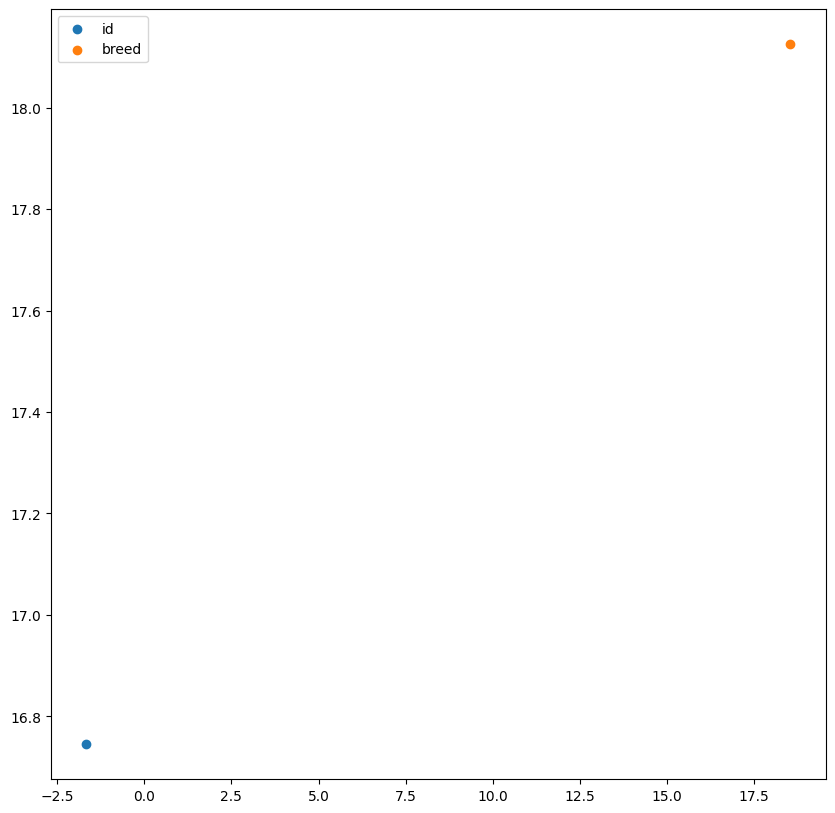

In [4]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
from keras.applications import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

# VGG16 모델을 사용해서 이미지를 특징 벡터로 변환
model = VGG16(weights='imagenet', include_top=False)

def image_to_feature_vector(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    return features.flatten()

# 이미지 데이터를 특징 벡터로 변환
feature_vectors = [image_to_feature_vector(img_path) for img_path in image_paths]
feature_vectors = np.array(feature_vectors)  # 리스트를 NumPy 배열로 변환

# 특징 벡터를 2차원으로 축소
tsne = TSNE(n_components=2)
X_2d = tsne.fit_transform(feature_vectors)

# 특징 벡터를 2차원으로 축소
tsne = TSNE(n_components=2)
X_2d = tsne.fit_transform(feature_vectors)

# 2차원 데이터를 시각화
plt.figure(figsize=(10, 10))
for i, label in enumerate(labels):
    plt.scatter(X_2d[i, 0], X_2d[i, 1], label=label)
plt.legend()
plt.show()
